In [1]:
# Import libraries
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Define a transform
transform = transforms.Compose( [ transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))] )

In [3]:
# Load train data
trainset = datasets.MNIST(root="../Data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
# Load validation data
# train is false for validation data
validationset = datasets.MNIST(root="../Data/", download=True, train=False, transform=transform)
validationloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
# Network class
class Classifier(nn.Module):

    # Constructor.
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    # Feed Forward
    def forward(self, x):

        # Flatten
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x))

        return x

In [6]:
# Model
model = Classifier()
# Loss function
criterion = nn.NLLLoss()
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [7]:
# Training and validation.
epochs = 30

train_losses, validation_losses = [], []
for epoch in range(epochs):

    # Training
    for images, labels in trainloader:

        # Forward pass
        logps = model(images)

        # Compute loss
        loss = criterion(logps, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    else:

        # Validation
        accuracy = 0

        # Turn off gradients
        with torch.no_grad():
            for images, labels in validationloader:

                logps = model(images)
                validation_loss = criterion(logps, labels)

                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(loss)
        validation_losses.append(validation_loss)

        print(f"Epoch: {epoch+1}/{epochs}:\n",
            f"Training loss: {loss}\n",
            f"Validation loss: {validation_loss}\n",
            f"Accuracy: {accuracy/len(validationloader)}")

Epoch: 1/30:
 Training loss: 2.1343486309051514
 Validation loss: 2.1315817832946777
 Accuracy: 0.5811400413513184
Epoch: 2/30:
 Training loss: 0.8567383885383606
 Validation loss: 1.1314785480499268
 Accuracy: 0.7381896376609802
Epoch: 3/30:
 Training loss: 0.9212880730628967
 Validation loss: 0.5228612422943115
 Accuracy: 0.824476957321167
Epoch: 4/30:
 Training loss: 0.46787333488464355
 Validation loss: 0.5713558793067932
 Accuracy: 0.8604244589805603
Epoch: 5/30:
 Training loss: 0.2838575541973114
 Validation loss: 0.745300829410553
 Accuracy: 0.8793143630027771
Epoch: 6/30:
 Training loss: 0.5102883577346802
 Validation loss: 0.4751072824001312
 Accuracy: 0.8916744589805603
Epoch: 7/30:
 Training loss: 0.6843396425247192
 Validation loss: 0.48961883783340454
 Accuracy: 0.8966384530067444
Epoch: 8/30:
 Training loss: 0.37702426314353943
 Validation loss: 0.23610088229179382
 Accuracy: 0.902601957321167
Epoch: 9/30:
 Training loss: 0.37022629380226135
 Validation loss: 0.3471271395

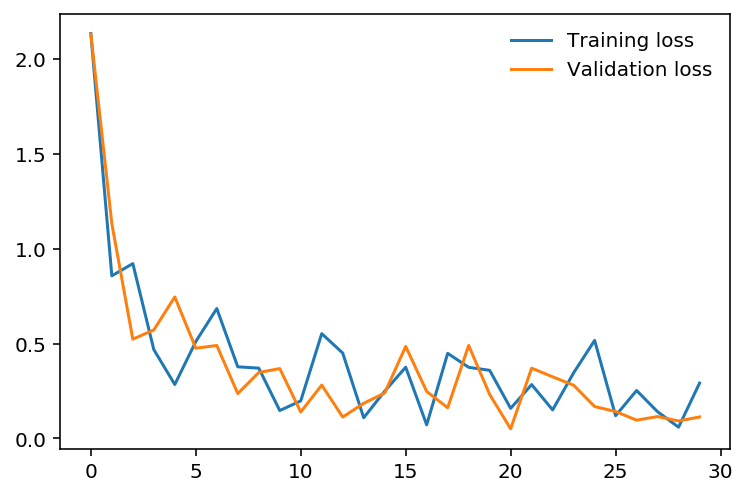

In [12]:
#Plotting cost curves
plt.plot(train_losses, label="Training loss")
plt.plot(validation_losses, label="Validation loss")
plt.legend(frameon=False)
plt.show()